In [1]:
import pandas as pd
import anndata
import matplotlib.pyplot as plt
from ALLCools.plot import *

In [2]:
adata = anndata.read_h5ad('../../../../data/Brain/10X/HIP.10X.ABI.UMI.h5ad')

In [3]:
use_clusters = [
    'DG', 'CA1-ProS', 'CA3', 'Lamp5', 'Astro', 'Oligo', 'Sncg', 'Vip',
    'SUB-ProS', 'CA2', 'Sst', 'NP SUB', 'Micro-PVM', 'Endo', 'Pvalb', 'CR',
    'SMC-Peri', 'VLMC', 'Sst Chodl'
]

In [4]:
adata = adata[adata.obs['MajorType'].isin(use_clusters), :]

In [5]:
integration_group = {
    'Astro': 'Glia',
    'CA1-ProS': 'Exc',
    'CA2': 'Exc',
    'CA3': 'Exc',
    'CR': 'Exc',
    'CT SUB': 'Exc',
    'DG': 'DG',
    'Endo': 'Glia',
    'L2 IT RHP': 'Exc',
    'L2/3 IT CTX-1': 'Exc',
    'L2/3 IT ENTl': 'Exc',
    'L2/3 IT PPP': 'Exc',
    'L4/5 IT CTX': 'Exc',
    'L5 IT TPE-ENT': 'Exc',
    'L5 PT CTX': 'Exc',
    'L6 CT CTX': 'Exc',
    'L6 IT CTX': 'Exc',
    'L6b CTX': 'Exc',
    'Lamp5': 'Inh',
    'Micro-PVM': 'Glia',
    'NP SUB': 'Exc',
    'Oligo': 'Glia',
    'Pvalb': 'Inh',
    'SMC-Peri': 'Glia',
    'SUB-ProS': 'Exc',
    'Sncg': 'Inh',
    'Sst': 'Inh',
    'Sst Chodl': 'Inh',
    'V3d': 'Exc',
    'VLMC': 'Glia',
    'Vip': 'Inh'
}

major_group = {
    'Exc': 'Neuron',
    'Inh': 'Neuron',
    'Glia': 'Glia',
    'DG': 'DG',
}
adata.obs['IntegrationGroup'] = adata.obs['MajorType'].map(integration_group).map(major_group)

Trying to set attribute `.obs` of view, copying.


In [6]:
gene_meta = pd.read_csv(
    '/home/hanliu/ref/mouse/gencode/vm22/gencode.vM22.annotation.gene.flat.tsv.gz',
    index_col='gene_id', sep='\t')
base_to_id = {g.split('.')[0]: g for g in gene_meta.index}
adata.var['gene_id'] = adata.var['EnsemblID'].map(base_to_id)
adata = adata[:, ~adata.var['gene_id'].isna()].copy()

In [7]:
adata.var_names = adata.var['gene_id'].values

In [8]:
for group, cells in adata.obs.groupby('IntegrationGroup'):
    _adata = adata[cells.index, :]
    _adata.write_h5ad(f'10X.{group}.h5ad')

/home/hanliu/miniconda3/envs/allcools/lib/python3.8/site-packages/anndata/_core/anndata.py:1207: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'IntegrationGroup' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'IntegrationGroup' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'IntegrationGroup' as categorical


In [8]:
_adata = adata[adata.obs['IntegrationGroup'] == 'Neuron', :]
_adata.obs = _adata.obs[['MajorType', 'SubType']]
_adata.var = _adata.var[[]]
_adata.write_h5ad(f'10X.Neuron.h5ad')
_adata

AnnData object with n_obs × n_vars = 17634 × 21657
    obs: 'MajorType', 'SubType'

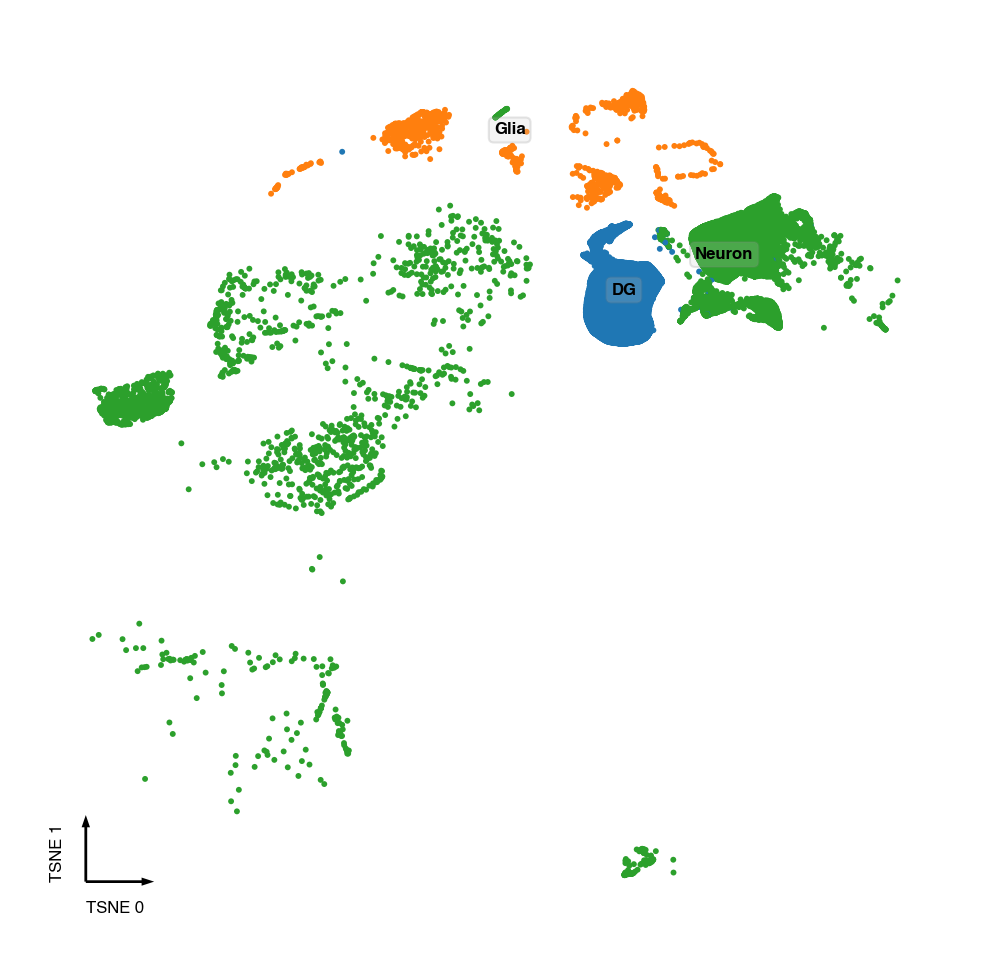

In [9]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=300)

_ = categorical_scatter(ax=ax,
                        data=adata.obs,
                        coord_base='tsne',
                        hue='IntegrationGroup',
                        text_anno='IntegrationGroup',
                        s=2,
                        max_points=None)

In [10]:
adata

AnnData object with n_obs × n_vars = 77343 × 21657
    obs: 'exp_component_name', 'platform_label', 'cluster_color', 'cluster_order', 'cluster_label', 'class_color', 'class_order', 'class_label', 'subclass_color', 'subclass_order', 'subclass_label', 'full_genotype_color', 'full_genotype_id', 'full_genotype_label', 'sex_color', 'sex_id', 'donor_sex_label', 'region_color', 'region_id', 'region_label', 'cell_type_accession_color', 'cell_type_accession_id', 'cell_type_accession_label', 'cell_type_alias_color', 'cell_type_alias_id', 'cell_type_alias_label', 'cell_type_alt_alias_color', 'cell_type_alt_alias_id', 'cell_type_alt_alias_label', 'cell_type_designation_color', 'cell_type_designation_id', 'cell_type_designation_label', 'neighborhood_label', 'neighborhood_id', 'neighborhood_color', 'external_donor_name_color', 'external_donor_name_id', 'external_donor_name_label', 'facs_population_plan_color', 'facs_population_plan_id', 'facs_population_plan_label', 'injection_materials_color', 'inj